# Corpus Analysis 
The corpus includes PDF resources provided by Katherine Vittum and collected by Jeff Duda. There is about 170 articles. This analysis is intended for exploring the corpus we already have collected and to draw insights into finding additional related resources.

In [2]:
import re
import nltk
import os
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup      
from tika import parser
from nltk import ngrams
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib notebook

## Data

In [3]:
raw_corpus_list = os.listdir('../data/pdf/')

### Parsing PDFs 

In [4]:
raw_corpus = ''
for file in raw_corpus_list:
    if file.endswith('pdf'):
        try:
            text = parser.from_file('../data/pdf/' + file)
            raw_corpus = raw_corpus + text['content']
            print('O - ' + str(file))
        except Exception as e:
            print('X - ' + str(e) + ' --- ' + str(file))
print('\n\nThe raw corpus string contains a string character length of: ' + str(len(raw_corpus)))

O - Ahearn_Dahlgren_2005_Limnology and Oceanography.pdf
O - Amos_2008_Thesis.pdf
O - Ashley et al._2006_Environmental Monitoring and Assessment.pdf
O - Berthelote_2013_Thesis.pdf
O - Bountry_etal_2013_Reviews in Engineering Geology.pdf
O - Bowman_2001_Thesis.pdf
O - Brazell_Cole_2009_Journal of the Pennsylvania Academy of Science.pdf
O - Bulak_etal_2011_Report.pdf
O - Burdick,_Hightower_2006_Transactions of the American Fisheries Society.pdf
O - Burroughs_2003_Thesis.pdf
O - Burroughs_2007_Thesis_Ch2.pdf
O - Burroughs_2007_Thesis_Ch3.pdf
O - Burroughs_etal_2009_Geomorphology.pdf
O - Burroughs_etal_2010_TransactionsOfTheAmericanFisheriesSociety.pdf
X - 'latin-1' codec can't encode character '\u2010' in position 27: ordinal not in range(256) --- Bushaw‐Newton_etal_2003_JAWRA.pdf
O - Cannatelli_Curran_2012_Journal of Hydraulic Engineering.pdf
O - Cantwell_etal_2014_Environmental monitoring and assessment.pdf
O - Casper_etal_2006_Archiv fuer Hydrobiologie Supplement.pdf
O - Catalano_2002_T

# Raw Text Analysis

### N-grams 

<IPython.core.display.Javascript object>


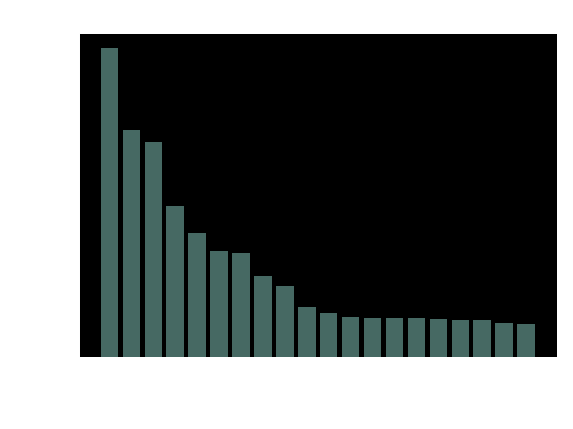

In [5]:
n = 1
unigrams = ngrams(raw_corpus.split(), n)

ct_unigrams = Counter(unigrams).most_common(20)

vals = []
labels = []
for i in ct_unigrams:
    vals.append(i[1])
    labels.append(i[0][0])
    
fig, axes = plt.subplots()

y_pos = np.arange(len(labels))
plt.bar(y_pos, vals, alpha=0.5)
axes.set_xticks(y_pos)
axes.set_xticklabels(labels, rotation=75)
plt.title('Top 20 Unigrams')
plt.xlabel('Unigrams')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


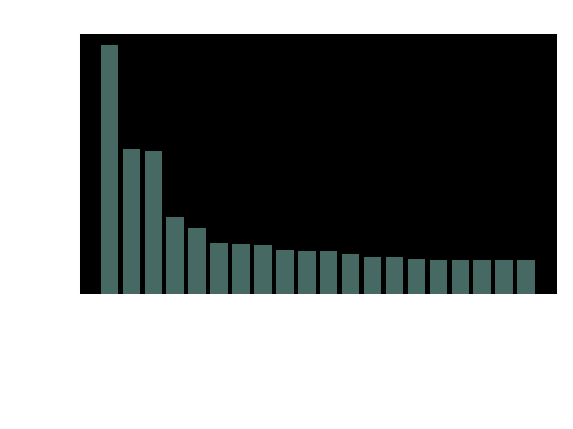

In [6]:
# Bigrams
n = 2
bigrams = ngrams(raw_corpus.split(), n)

ct_bigrams = Counter(bigrams).most_common(20)

vals = []
labels = []
for i in ct_bigrams:
    vals.append(i[1])
    labels.append(' '.join((i[0])))
    
fig, axes = plt.subplots()

y_pos = np.arange(len(labels))
plt.bar(y_pos, vals, alpha=0.5)
axes.set_xticks(y_pos)
axes.set_xticklabels(labels, rotation=75)
plt.title('Top 20 Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


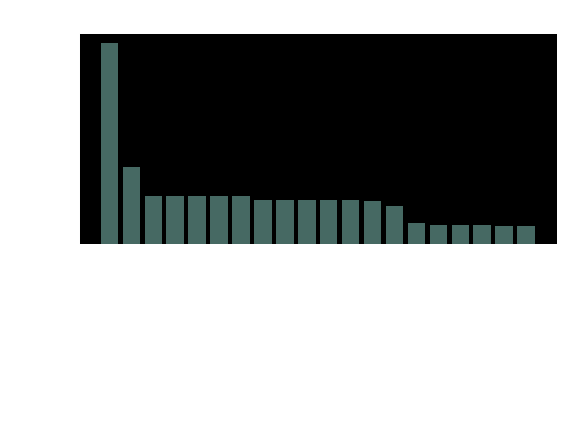

In [7]:
# Trigrams
n = 3
trigrams = ngrams(raw_corpus.split(), n)

ct_trigrams = Counter(trigrams).most_common(20)

vals = []
labels = []
for i in ct_trigrams:
    vals.append(i[1])
    labels.append(' '.join((i[0])))
    
fig, axes = plt.subplots()

y_pos = np.arange(len(labels))
plt.bar(y_pos, vals, alpha=0.5)
axes.set_xticks(y_pos)
axes.set_xticklabels(labels, rotation=80)
plt.title('Top 20 Trigrams')
plt.xlabel('Trigrams')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


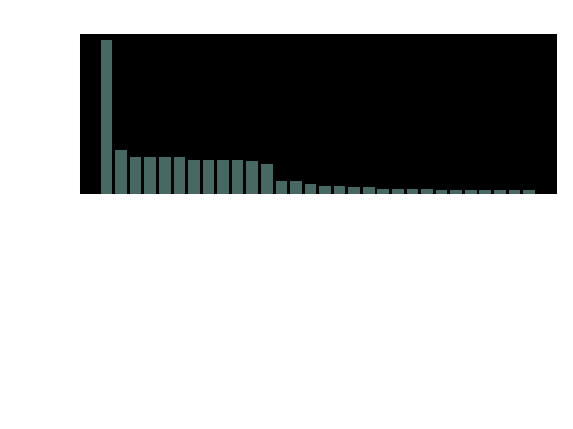

In [8]:
# quadgrams -- DO NOT USE
n = 4
quadgrams = ngrams(raw_corpus.split(), n)

ct_quadgrams = Counter(quadgrams).most_common(30)

vals = []
labels = []
for i in ct_quadgrams:
    vals.append(i[1])
    labels.append(' '.join((i[0])))
    
fig, axes = plt.subplots()

y_pos = np.arange(len(labels))
plt.bar(y_pos, vals, alpha=0.5)
axes.set_xticks(y_pos)
axes.set_xticklabels(labels, rotation=90)
plt.title('Top 20 Quadgrams')
plt.xlabel('Quadgrams')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Pre-Processing

In [9]:
def review_to_words(raw_review):
    # rm non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    # to lower case, split into individual words
    words = letters_only.lower().split()                             
    # searching a set is faster than searching a list - convert stopwords to a set
    stops = set(stopwords.words("english"))                  
    # rm stop words
    meaningful_words = [w for w in words if not w in stops]   
    # Join the words back into one string separated by space, and return the result.
    return(" ".join(meaningful_words))

In [10]:
# process corpus
clean_corpus = review_to_words(raw_corpus)

### Save Cleaned Corpus

In [ ]:
with open('clean_full_corpus.txt', 'w') as f:
    f.write(clean_corpus)

## Create Features

In [11]:
vectorizer = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 300) 

In [12]:
train_data_features = vectorizer.fit_transform(clean_corpus.split('water'))

train_data_features = train_data_features.toarray()
train_data_features.shape

(11839, 300)

## Vocabulary

In [13]:
vocab = vectorizer.get_feature_names()
print(vocab)

['abundance', 'al', 'along', 'also', 'although', 'american', 'among', 'analysis', 'annual', 'appendix', 'approximately', 'aquatic', 'area', 'areas', 'assemblage', 'assemblages', 'associated', 'august', 'available', 'average', 'bank', 'baraboo', 'based', 'bass', 'bed', 'bedload', 'benthic', 'bg', 'breach', 'breaching', 'bridge', 'calculated', 'change', 'changes', 'channel', 'clark', 'cm', 'collected', 'communities', 'community', 'compared', 'composition', 'concentrations', 'conditions', 'control', 'could', 'creek', 'cross', 'daily', 'dam', 'dams', 'data', 'date', 'day', 'de', 'density', 'department', 'deposition', 'depth', 'differences', 'different', 'discharge', 'distance', 'distribution', 'doi', 'downstream', 'doyle', 'ds', 'due', 'ecological', 'effect', 'effects', 'elevation', 'end', 'environmental', 'er', 'erosion', 'estimated', 'et', 'family', 'field', 'fig', 'figure', 'fine', 'first', 'fish', 'fisheries', 'fishes', 'flood', 'flow', 'flows', 'following', 'fork', 'former', 'found', 

In [14]:
# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

counts = []
for tag, count in zip(vocab, dist):
    tup = (count, tag)
    counts.append(tup)
    print(count, tag)

1089 abundance
6441 al
1203 along
2289 also
998 although
2241 american
708 among
1754 analysis
1132 annual
832 appendix
1012 approximately
917 aquatic
2974 area
986 areas
894 assemblage
801 assemblages
1178 associated
666 august
697 available
1426 average
1788 bank
1751 baraboo
1201 based
1302 bass
3369 bed
935 bedload
744 benthic
1120 bg
880 breach
741 breaching
685 bridge
714 calculated
1646 change
2923 changes
7728 channel
1087 clark
857 cm
2241 collected
711 communities
1062 community
787 compared
839 composition
968 concentrations
1642 conditions
1013 control
889 could
2707 creek
2562 cross
813 daily
22558 dam
3723 dams
4529 data
726 date
907 day
834 de
1046 density
778 department
1371 deposition
1453 depth
1074 differences
1026 different
2558 discharge
987 distance
1242 distribution
679 doi
6673 downstream
1112 doyle
1013 ds
1189 due
1337 ecological
801 effect
2579 effects
982 elevation
666 end
1426 environmental
905 er
2562 erosion
1013 estimated
6272 et
903 family
1248 field
15

In [16]:
top_20 = sorted(counts)[-20:]
print(top_20)

[(3999, 'study'), (4053, 'sites'), (4444, 'stream'), (4460, 'species'), (4529, 'data'), (4727, 'reservoir'), (4952, 'site'), (5657, 'upstream'), (6039, 'figure'), (6162, 'fish'), (6272, 'et'), (6441, 'al'), (6673, 'downstream'), (7728, 'channel'), (11550, 'sediment'), (13701, 'river'), (13705, 'removal'), (22558, 'dam'), (24161, 'pst'), (45339, 'pdt')]


In [17]:
vals = []
labels = []
for i in top_20:
    vals.append(i[0])
    labels.append(i[1])

<IPython.core.display.Javascript object>


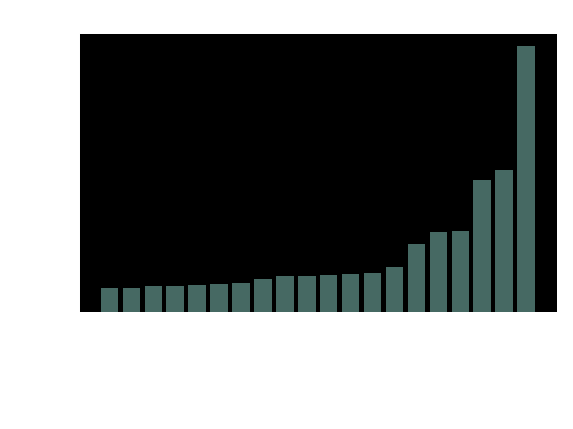

In [18]:
fig, axes = plt.subplots()

y_pos = np.arange(len(labels))
plt.bar(y_pos, vals, alpha=0.5)
axes.set_xticks(y_pos)
axes.set_xticklabels(labels, rotation=90)
plt.title('Top 20 Terms')
plt.xlabel('Terms')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Ngrams

<IPython.core.display.Javascript object>


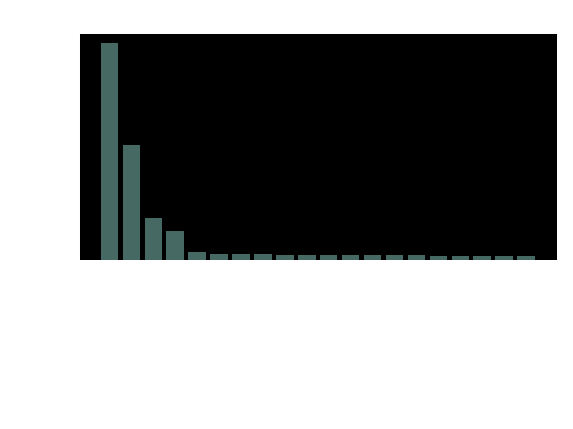

In [19]:
# Bigrams
n = 2
bigrams = ngrams(clean_corpus.split(), n)

ct_bigrams = Counter(bigrams).most_common(20)

vals = []
labels = []
for i in ct_bigrams:
    vals.append(i[1])
    labels.append(' '.join((i[0])))
    
fig, axes = plt.subplots()

y_pos = np.arange(len(labels))
plt.bar(y_pos, vals, alpha=0.5)
axes.set_xticks(y_pos)
axes.set_xticklabels(labels, rotation=90)
plt.title('Top 20 Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
len(clean_corpus.split())

<IPython.core.display.Javascript object>


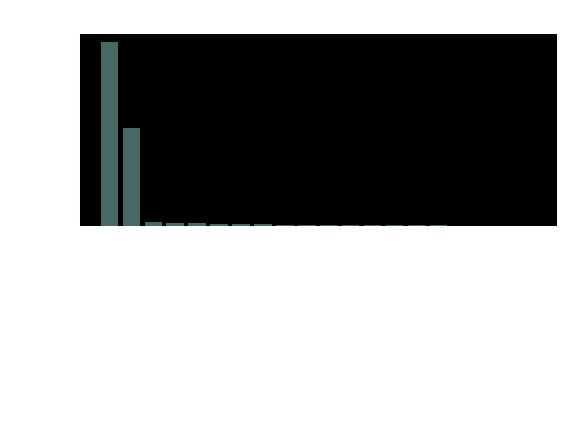

In [20]:
# Trigrams
n = 3
trigrams = ngrams(clean_corpus.split(), n)

ct_trigrams = Counter(trigrams).most_common(20)

vals = []
labels = []
for i in ct_trigrams:
    vals.append(i[1])
    labels.append(' '.join((i[0])))
    
fig, axes = plt.subplots()

y_pos = np.arange(len(labels))
plt.bar(y_pos, vals, alpha=0.5)
axes.set_xticks(y_pos)
axes.set_xticklabels(labels, rotation=90)
plt.title('Top 20 Trigrams')
plt.xlabel('Trigrams')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Word Cloud

<IPython.core.display.Javascript object>


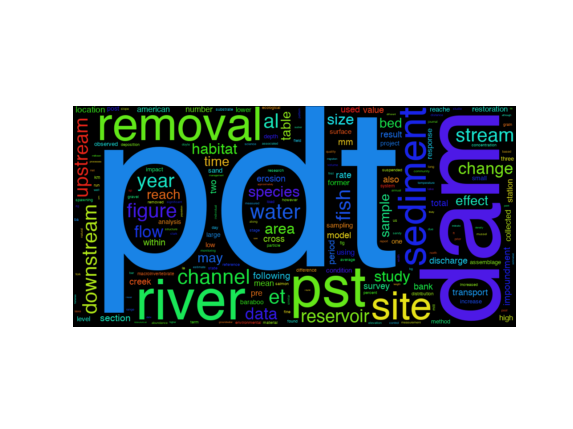

In [21]:
wordcloud = WordCloud(width=1000, height=500, margin=10, font_path='Helvetica').generate(clean_corpus)
fig, axes = plt.subplots()
axes.grid(False)
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)

plt.imshow(wordcloud, interpolation="bilinear")